# Expert Knowledge
## Utilizing Expert Knowledge and Time Series

In [51]:
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [52]:
#pip install mglearn

In [53]:
import mglearn

In [54]:
# Load the city bike dataset
citibike = mglearn.datasets.load_citibike()

# Display number of rentals at different times
print("Citi Bike data:\n{}".format(citibike.head(20)))

Citi Bike data:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
2015-08-01 15:00:00    27
2015-08-01 18:00:00    12
2015-08-01 21:00:00     4
2015-08-02 00:00:00     3
2015-08-02 03:00:00     4
2015-08-02 06:00:00     6
2015-08-02 09:00:00    30
2015-08-02 12:00:00    46
2015-08-02 15:00:00    27
2015-08-02 18:00:00    28
2015-08-02 21:00:00     6
2015-08-03 00:00:00     3
2015-08-03 03:00:00     2
2015-08-03 06:00:00    21
2015-08-03 09:00:00     9
Freq: 3h, Name: one, dtype: int64


Text(0, 0.5, 'Rentals')

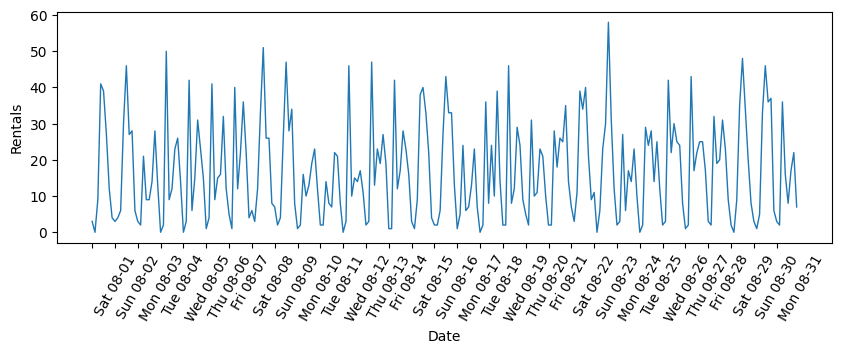

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the size of the data set
plt.figure(figsize = (10, 3))

# Arrange the data set using date_range() method
xticks = pd.date_range(start = citibike.index.min(), end = citibike.index.max(), freq = 'D')

# Set the date format for the plot
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation = 60, ha = "left")
# plt.xticks(xticks, xticks.strftime("%d-%m-%d"), rotation = 90, ha = "left")

plt.plot(citibike, linewidth = 1)
plt.xlabel("Date")
plt.ylabel("Rentals")

In [56]:
# Example to understand reshape(-1, 1)
import numpy as np

arr = np.array([[1, 2, 3], [4, 5, 6]])
print(arr)

newarr = arr.reshape(-1, 1)
print(newarr)

[[1 2 3]
 [4 5 6]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


In [57]:
# https://www.w3schools.com/python/trypython.asp?filename=demo_ref_math_floor
val1 = 3
val2 = 2
  
# using the floor division
res = val1 // val2
print(res)

1


In [58]:
# Display the citibike values
citibike.index.astype("int64").values
citibike.values

array([ 3,  0,  9, 41, 39, 27, 12,  4,  3,  4,  6, 30, 46, 27, 28,  6,  3,
        2, 21,  9,  9, 14, 28, 13,  0,  2, 50,  9, 12, 23, 26, 14,  0,  3,
       42,  6, 15, 31, 23, 15,  1,  4, 41,  9, 15, 16, 32, 12,  5,  1, 40,
       12, 22, 36, 22,  4,  6,  3, 12, 33, 51, 26, 26,  8,  7,  2,  4, 26,
       47, 28, 34,  8,  1,  2, 16, 10, 13, 19, 23, 12,  2,  2, 14,  8,  7,
       22, 21,  8,  0,  3, 46, 10, 15, 14, 17, 11,  2,  3, 47, 13, 23, 19,
       27, 19,  1,  1, 42, 12, 17, 28, 23, 16,  3,  1,  9, 38, 40, 33, 22,
        4,  2,  2,  6, 27, 43, 33, 33, 13,  1,  5, 24,  6,  7, 13, 23,  7,
        0,  2, 36,  8, 24, 10, 39, 14,  2,  2, 46,  8, 12, 29, 24,  9,  5,
        2, 31, 10, 11, 23, 21, 10,  2,  2, 28, 18, 26, 25, 35, 14,  7,  3,
       11, 39, 34, 40, 21,  9, 11,  0,  6, 23, 30, 58, 31, 12,  2,  3, 27,
        6, 17, 14, 23, 10,  0,  2, 29, 24, 28, 14, 25, 12,  2,  3, 42, 22,
       30, 25, 24,  8,  1,  2, 43, 17, 22, 25, 25, 17,  3,  2, 32, 19, 20,
       31, 23,  9,  2,  0

In [59]:
citibike.index.astype("int64").values.reshape(-1, 1) 

array([[1438387200000000000],
       [1438398000000000000],
       [1438408800000000000],
       [1438419600000000000],
       [1438430400000000000],
       [1438441200000000000],
       [1438452000000000000],
       [1438462800000000000],
       [1438473600000000000],
       [1438484400000000000],
       [1438495200000000000],
       [1438506000000000000],
       [1438516800000000000],
       [1438527600000000000],
       [1438538400000000000],
       [1438549200000000000],
       [1438560000000000000],
       [1438570800000000000],
       [1438581600000000000],
       [1438592400000000000],
       [1438603200000000000],
       [1438614000000000000],
       [1438624800000000000],
       [1438635600000000000],
       [1438646400000000000],
       [1438657200000000000],
       [1438668000000000000],
       [1438678800000000000],
       [1438689600000000000],
       [1438700400000000000],
       [1438711200000000000],
       [1438722000000000000],
       [1438732800000000000],
       [14

In [60]:
# extract the target values (number of rentals)
y = citibike.values

# convert to POSIX time by dividing by 10**9
X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9

X.shape, y.shape

((248, 1), (248,))

In [61]:
print(X[:20])

[[1438387200]
 [1438398000]
 [1438408800]
 [1438419600]
 [1438430400]
 [1438441200]
 [1438452000]
 [1438462800]
 [1438473600]
 [1438484400]
 [1438495200]
 [1438506000]
 [1438516800]
 [1438527600]
 [1438538400]
 [1438549200]
 [1438560000]
 [1438570800]
 [1438581600]
 [1438592400]]


In [62]:
# use the first 184 data points for training and the rest for testing
n_train = 184

# function to evaluate and plot a regressor on a given feature set
def eval_on_features(features, target, regressor):
    # split the given features into a training and a test set
    X_train, X_test = features[:n_train], features[n_train:]
    # also split the target array
    y_train, y_test = target[:n_train], target[n_train:]    
    regressor.fit(X_train, y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize = (10, 3))

    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation = 90, ha = "left")

    plt.plot(range(n_train), y_train, label = "train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label = "test")
    plt.plot(range(n_train), y_pred_train, '--', label = "prediction train")

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label = "prediction test")
    plt.legend(loc = (1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

In [63]:
print(X, y)

[[1438387200]
 [1438398000]
 [1438408800]
 [1438419600]
 [1438430400]
 [1438441200]
 [1438452000]
 [1438462800]
 [1438473600]
 [1438484400]
 [1438495200]
 [1438506000]
 [1438516800]
 [1438527600]
 [1438538400]
 [1438549200]
 [1438560000]
 [1438570800]
 [1438581600]
 [1438592400]
 [1438603200]
 [1438614000]
 [1438624800]
 [1438635600]
 [1438646400]
 [1438657200]
 [1438668000]
 [1438678800]
 [1438689600]
 [1438700400]
 [1438711200]
 [1438722000]
 [1438732800]
 [1438743600]
 [1438754400]
 [1438765200]
 [1438776000]
 [1438786800]
 [1438797600]
 [1438808400]
 [1438819200]
 [1438830000]
 [1438840800]
 [1438851600]
 [1438862400]
 [1438873200]
 [1438884000]
 [1438894800]
 [1438905600]
 [1438916400]
 [1438927200]
 [1438938000]
 [1438948800]
 [1438959600]
 [1438970400]
 [1438981200]
 [1438992000]
 [1439002800]
 [1439013600]
 [1439024400]
 [1439035200]
 [1439046000]
 [1439056800]
 [1439067600]
 [1439078400]
 [1439089200]
 [1439100000]
 [1439110800]
 [1439121600]
 [1439132400]
 [1439143200]
 [1439

Test-set R^2: -0.04


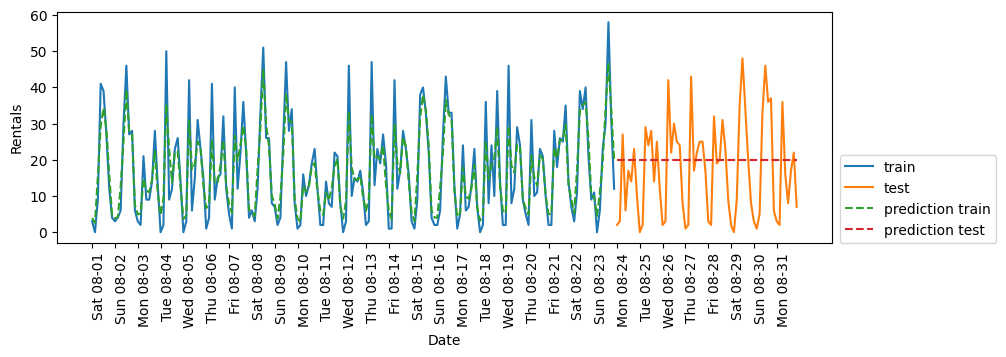

In [64]:
from sklearn.ensemble import RandomForestRegressor

# Create an object 'regressor' by calling a method RandomForestRegressor()
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

# Call the method eval_on_features() to calculate the R^2 and plot
eval_on_features(X, y, regressor)

In [65]:
X

array([[1438387200],
       [1438398000],
       [1438408800],
       [1438419600],
       [1438430400],
       [1438441200],
       [1438452000],
       [1438462800],
       [1438473600],
       [1438484400],
       [1438495200],
       [1438506000],
       [1438516800],
       [1438527600],
       [1438538400],
       [1438549200],
       [1438560000],
       [1438570800],
       [1438581600],
       [1438592400],
       [1438603200],
       [1438614000],
       [1438624800],
       [1438635600],
       [1438646400],
       [1438657200],
       [1438668000],
       [1438678800],
       [1438689600],
       [1438700400],
       [1438711200],
       [1438722000],
       [1438732800],
       [1438743600],
       [1438754400],
       [1438765200],
       [1438776000],
       [1438786800],
       [1438797600],
       [1438808400],
       [1438819200],
       [1438830000],
       [1438840800],
       [1438851600],
       [1438862400],
       [1438873200],
       [1438884000],
       [14388

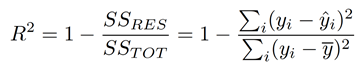

In [66]:
from IPython.display import Image
Image(filename =r'R2_Score.png')

In [67]:
# Store the data hourly in X_hour and make one column using reshape(-1, 1)
X_hour = citibike.index.hour.values.reshape(-1, 1)

print(X_hour)

[[ 0]
 [ 3]
 [ 6]
 [ 9]
 [12]
 [15]
 [18]
 [21]
 [ 0]
 [ 3]
 [ 6]
 [ 9]
 [12]
 [15]
 [18]
 [21]
 [ 0]
 [ 3]
 [ 6]
 [ 9]
 [12]
 [15]
 [18]
 [21]
 [ 0]
 [ 3]
 [ 6]
 [ 9]
 [12]
 [15]
 [18]
 [21]
 [ 0]
 [ 3]
 [ 6]
 [ 9]
 [12]
 [15]
 [18]
 [21]
 [ 0]
 [ 3]
 [ 6]
 [ 9]
 [12]
 [15]
 [18]
 [21]
 [ 0]
 [ 3]
 [ 6]
 [ 9]
 [12]
 [15]
 [18]
 [21]
 [ 0]
 [ 3]
 [ 6]
 [ 9]
 [12]
 [15]
 [18]
 [21]
 [ 0]
 [ 3]
 [ 6]
 [ 9]
 [12]
 [15]
 [18]
 [21]
 [ 0]
 [ 3]
 [ 6]
 [ 9]
 [12]
 [15]
 [18]
 [21]
 [ 0]
 [ 3]
 [ 6]
 [ 9]
 [12]
 [15]
 [18]
 [21]
 [ 0]
 [ 3]
 [ 6]
 [ 9]
 [12]
 [15]
 [18]
 [21]
 [ 0]
 [ 3]
 [ 6]
 [ 9]
 [12]
 [15]
 [18]
 [21]
 [ 0]
 [ 3]
 [ 6]
 [ 9]
 [12]
 [15]
 [18]
 [21]
 [ 0]
 [ 3]
 [ 6]
 [ 9]
 [12]
 [15]
 [18]
 [21]
 [ 0]
 [ 3]
 [ 6]
 [ 9]
 [12]
 [15]
 [18]
 [21]
 [ 0]
 [ 3]
 [ 6]
 [ 9]
 [12]
 [15]
 [18]
 [21]
 [ 0]
 [ 3]
 [ 6]
 [ 9]
 [12]
 [15]
 [18]
 [21]
 [ 0]
 [ 3]
 [ 6]
 [ 9]
 [12]
 [15]
 [18]
 [21]
 [ 0]
 [ 3]
 [ 6]
 [ 9]
 [12]
 [15]
 [18]
 [21]
 [ 0]
 [ 3]
 [ 6]
 [ 9]
 [12]
 [15]
 [18

Test-set R^2: 0.60

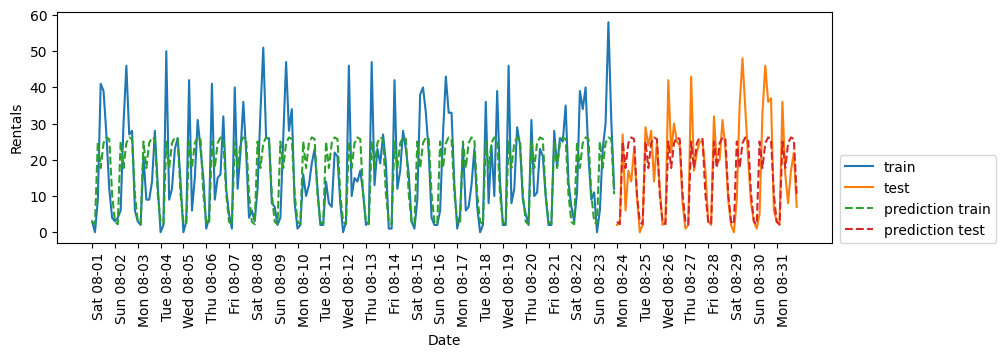

In [68]:
# Store the data hourly in X_hour and make one column using reshape(-1, 1)
X_hour = citibike.index.hour.values.reshape(-1, 1)

# Call a method eval_on_features() to evaluate R^2 and plot
eval_on_features(X_hour, y, regressor)

In [69]:
# Store the hourly data weekly in X_hour_week and make one column using reshape(-1, 1)
X_day_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1), citibike.index.hour.values.reshape(-1, 1)])

print(X_day_hour_week, type(X_hour), y)

[[ 5  0]
 [ 5  3]
 [ 5  6]
 [ 5  9]
 [ 5 12]
 [ 5 15]
 [ 5 18]
 [ 5 21]
 [ 6  0]
 [ 6  3]
 [ 6  6]
 [ 6  9]
 [ 6 12]
 [ 6 15]
 [ 6 18]
 [ 6 21]
 [ 0  0]
 [ 0  3]
 [ 0  6]
 [ 0  9]
 [ 0 12]
 [ 0 15]
 [ 0 18]
 [ 0 21]
 [ 1  0]
 [ 1  3]
 [ 1  6]
 [ 1  9]
 [ 1 12]
 [ 1 15]
 [ 1 18]
 [ 1 21]
 [ 2  0]
 [ 2  3]
 [ 2  6]
 [ 2  9]
 [ 2 12]
 [ 2 15]
 [ 2 18]
 [ 2 21]
 [ 3  0]
 [ 3  3]
 [ 3  6]
 [ 3  9]
 [ 3 12]
 [ 3 15]
 [ 3 18]
 [ 3 21]
 [ 4  0]
 [ 4  3]
 [ 4  6]
 [ 4  9]
 [ 4 12]
 [ 4 15]
 [ 4 18]
 [ 4 21]
 [ 5  0]
 [ 5  3]
 [ 5  6]
 [ 5  9]
 [ 5 12]
 [ 5 15]
 [ 5 18]
 [ 5 21]
 [ 6  0]
 [ 6  3]
 [ 6  6]
 [ 6  9]
 [ 6 12]
 [ 6 15]
 [ 6 18]
 [ 6 21]
 [ 0  0]
 [ 0  3]
 [ 0  6]
 [ 0  9]
 [ 0 12]
 [ 0 15]
 [ 0 18]
 [ 0 21]
 [ 1  0]
 [ 1  3]
 [ 1  6]
 [ 1  9]
 [ 1 12]
 [ 1 15]
 [ 1 18]
 [ 1 21]
 [ 2  0]
 [ 2  3]
 [ 2  6]
 [ 2  9]
 [ 2 12]
 [ 2 15]
 [ 2 18]
 [ 2 21]
 [ 3  0]
 [ 3  3]
 [ 3  6]
 [ 3  9]
 [ 3 12]
 [ 3 15]
 [ 3 18]
 [ 3 21]
 [ 4  0]
 [ 4  3]
 [ 4  6]
 [ 4  9]
 [ 4 12]
 [ 4 15]
 [ 4 18]
 

Test-set R^2: 0.84


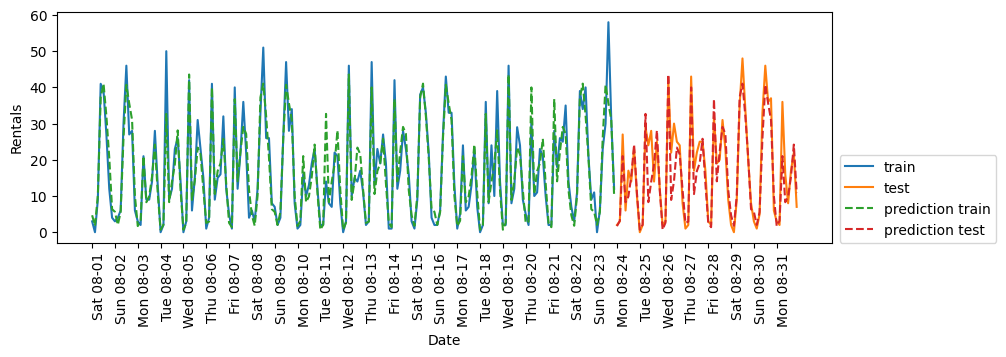

In [70]:
# Store the hourly data weekly in X_hour_week and make one column using reshape(-1, 1)
X_day_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1), citibike.index.hour.values.reshape(-1, 1)])

# Call a method eval_on_features() to evaluate R^2 and plot
eval_on_features(X_day_hour_week, y, regressor)

Test-set R^2: 0.13


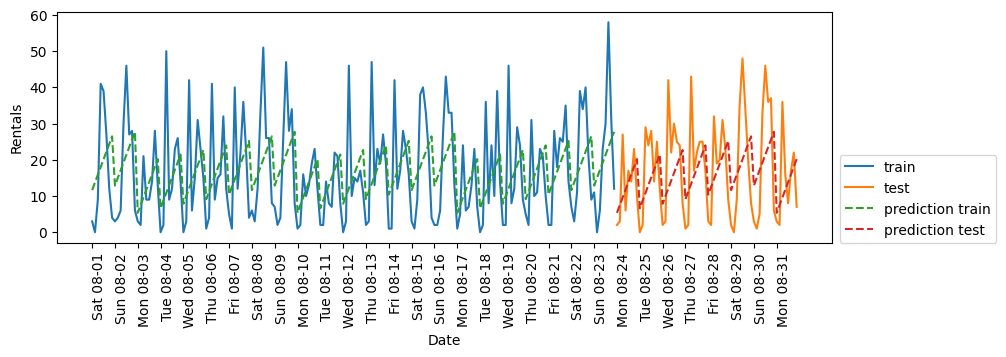

In [71]:
# import LinearRegression library from sklearn
from sklearn.linear_model import LinearRegression

# Call a method eval_on_features() to evaluate R^2 and plot
eval_on_features(X_day_hour_week, y, LinearRegression())

In [72]:
# import OneHotEncoder from sklearn
from sklearn.preprocessing import OneHotEncoder

# Declare an object (enc) by calling a method OneHotEncoder()
enc = OneHotEncoder()

# Create an array by calling a fit() method
X_day_hour_week_onehot = enc.fit_transform(X_day_hour_week).toarray()

X_day_hour_week_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

Test-set R^2: 0.62


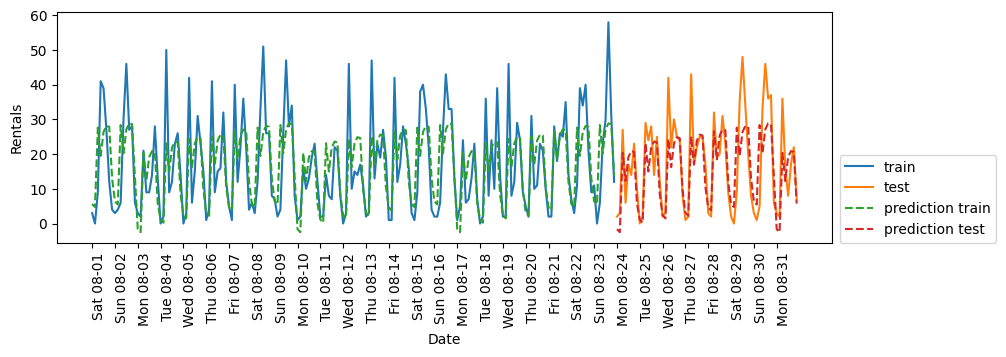

In [73]:
# import LinearRegression library from sklearn
from sklearn.linear_model import LinearRegression

# Call a method eval_on_features() to evaluate R^2 and plot
eval_on_features(X_day_hour_week_onehot, y, LinearRegression())

Test-set R^2: 0.62


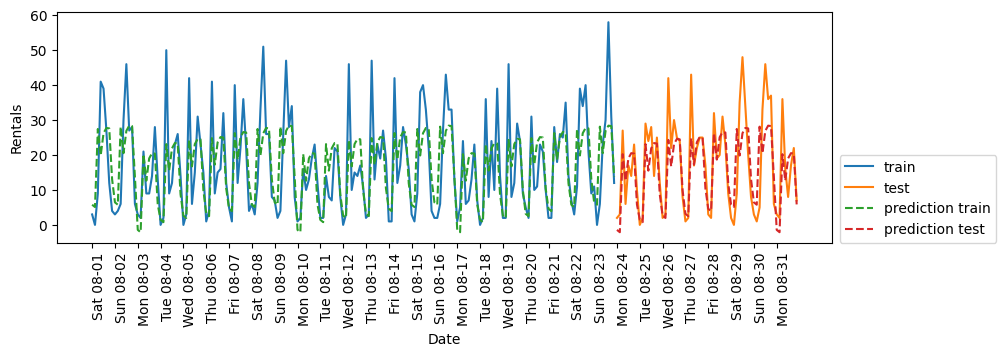

In [74]:
# import a library (Ridge) from sklearn
from sklearn.linear_model import Ridge

# Call a method eval_on_features() to evaluate R^2 and plot 
eval_on_features(X_day_hour_week_onehot, y, Ridge())

Test-set R^2: 0.85


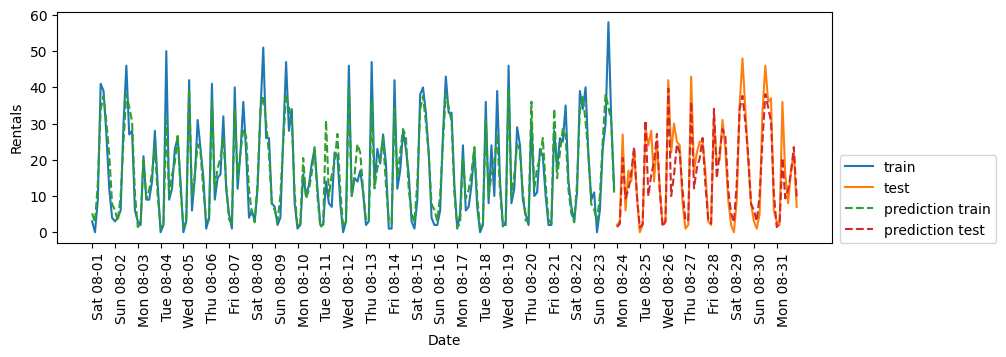

In [75]:
# import polynomial library from sklearn
from sklearn.preprocessing import PolynomialFeatures
# https://en.wikipedia.org/wiki/Polynomial_regression
# y = ax + b: Linear Regression, y = ax^2 + bx + x: Polynomial Regression

# Create and initialise an object named as PolynomialFeatures()
poly_transformer = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)

# Call fit() method to train the model
X_day_hour_week_onehot_poly = poly_transformer.fit_transform(X_day_hour_week_onehot)

# Initialise an object by calling a method Ridge()
lr = Ridge()

# Call a method eval_on_features() to evaluate R^2 and plot 
eval_on_features(X_day_hour_week_onehot_poly, y, lr)

### Reference
- Introduction to Machine Learning Third Edition, The MIT Press Cambridge, London, England, 2014.